In [544]:
# Divorce Dataset: DateTime Handling and Patterns over Time
# Load with parse_dates (primary method from lecture)
divorce = pd.read_csv("divorce.csv", parse_dates=['marriage_date'])
divorce['marriage_month'] = divorce['marriage_date'].dt.month
divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,marriage_month
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,6
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN,9
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0,2
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN,5
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN,8


In [545]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

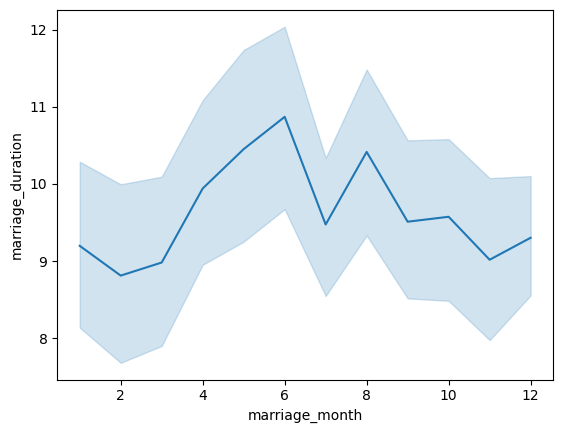

In [546]:
# Visualizing patterns over time (month)
sns.lineplot(data=divorce, x="marriage_month", y="marriage_duration")
plt.show()

In [547]:
# Additional DateTime columns and year extraction
divorce = pd.read_csv("divorce.csv", parse_dates=['divorce_date', 'dob_man', 'dob_woman'])
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])
divorce["marriage_year"] = divorce["marriage_date"].dt.year

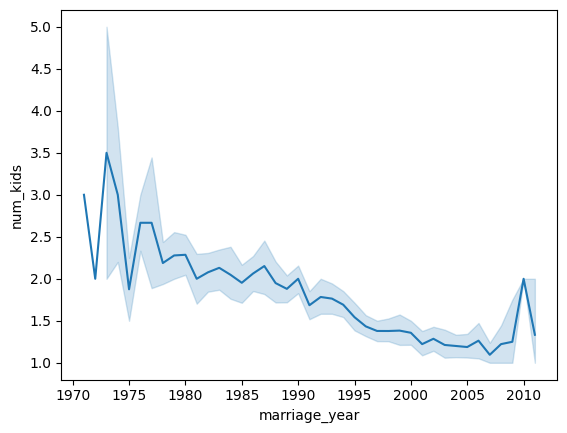

In [548]:
# Patterns over time (year)
sns.lineplot(data=divorce, x="marriage_year", y="num_kids")
plt.show()

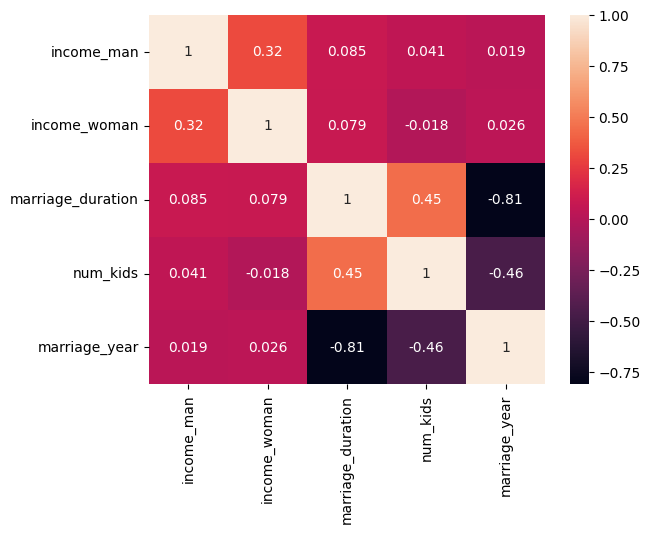

In [549]:
# Divorce: Correlations and Heatmap
divorce.corr(numeric_only=True)
sns.heatmap(divorce.corr(numeric_only=True), annot=True)
plt.show()

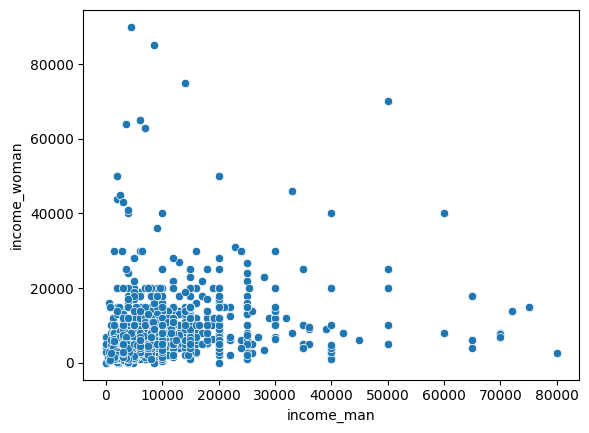

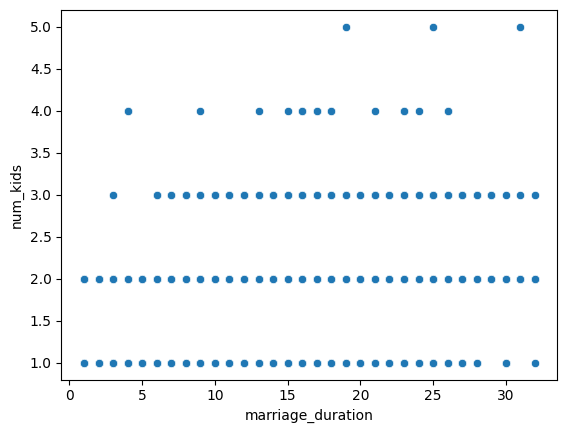

In [550]:
# Divorce: Scatterplots
sns.scatterplot(data=divorce, x='income_man', y='income_woman')
plt.show()

sns.scatterplot(data=divorce, x="marriage_duration", y="num_kids")
plt.show()

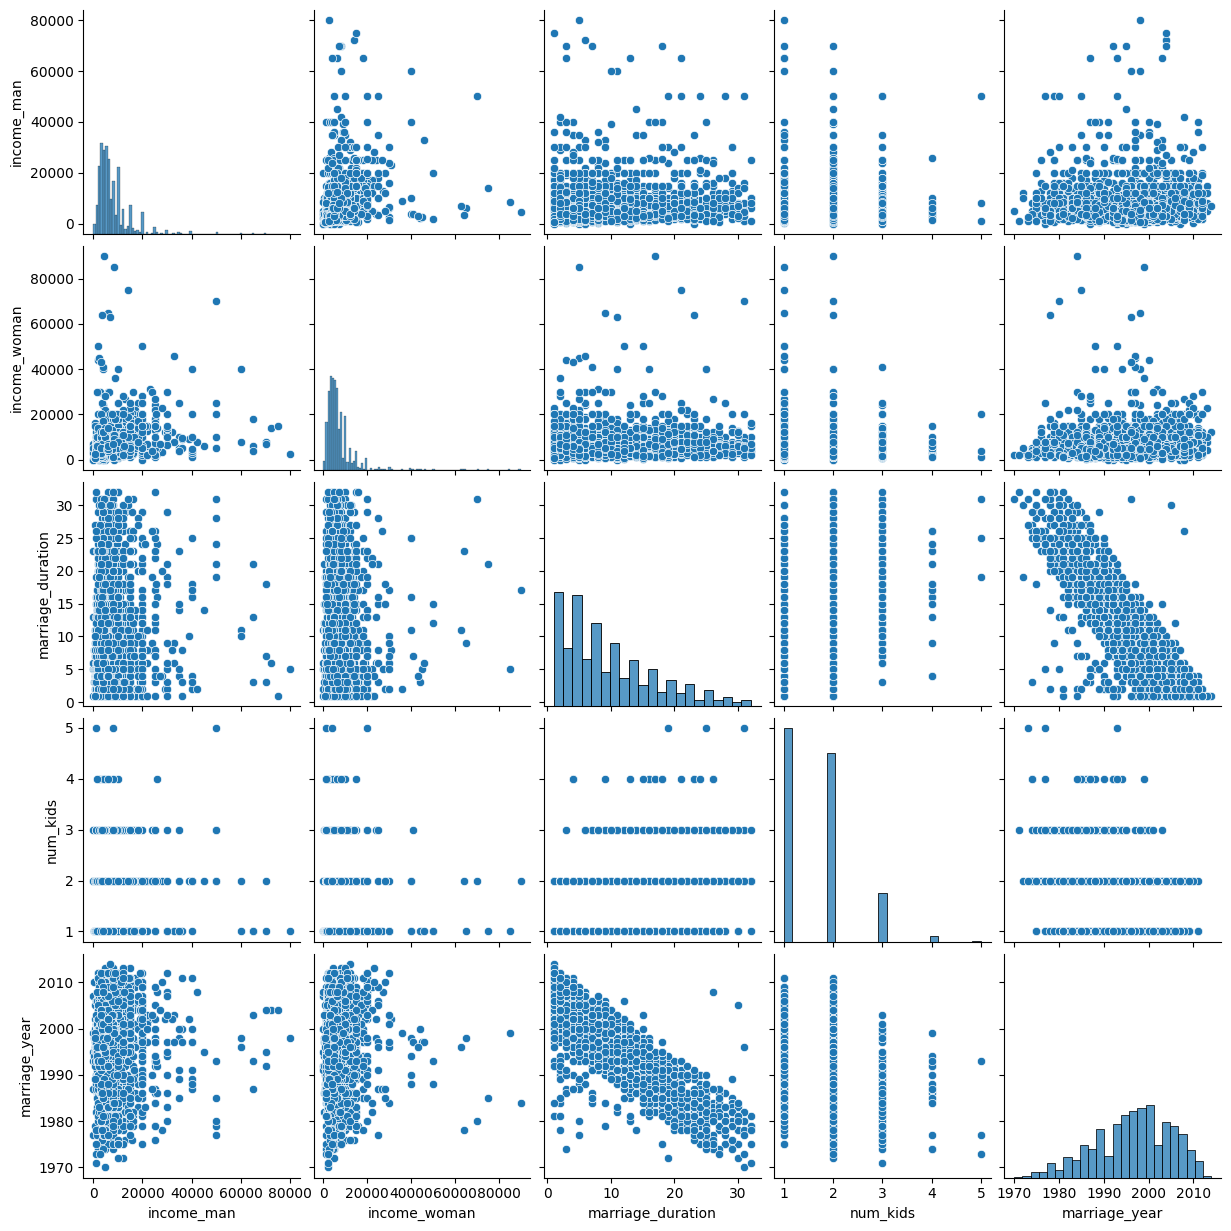

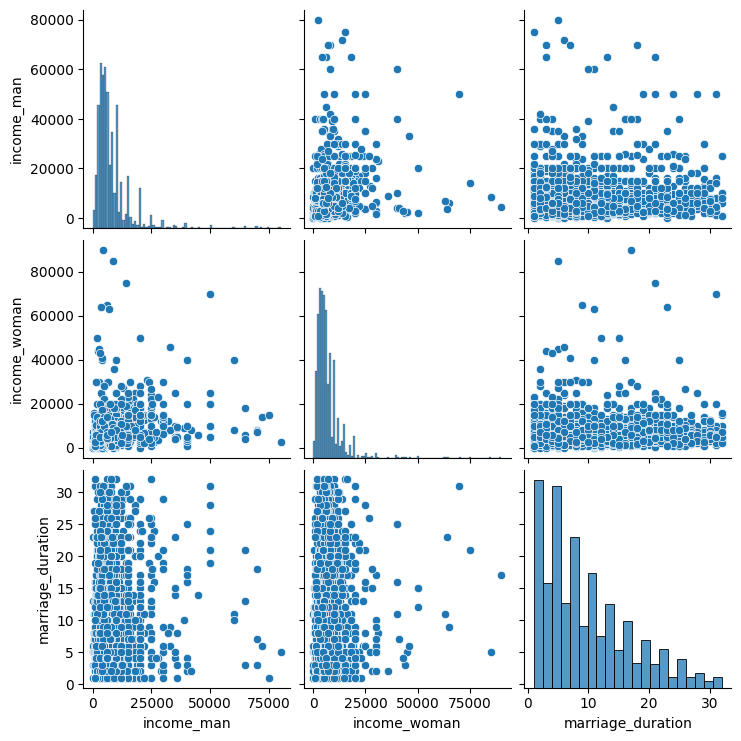

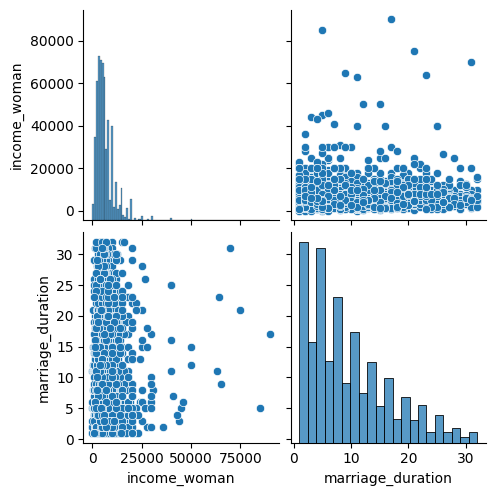

In [551]:
# Divorce: Pairplots
sns.pairplot(data=divorce)
plt.show()

sns.pairplot(data=divorce, vars=["income_man", "income_woman", "marriage_duration"])
plt.show()

sns.pairplot(data=divorce, vars=["income_woman", "marriage_duration"])
plt.show()

In [552]:
# Divorce: Categorical Counts
divorce['education_man'].value_counts()

education_man
Professional    1313
Preparatory      501
Secondary        288
Primary          100
Other              3
Name: count, dtype: int64

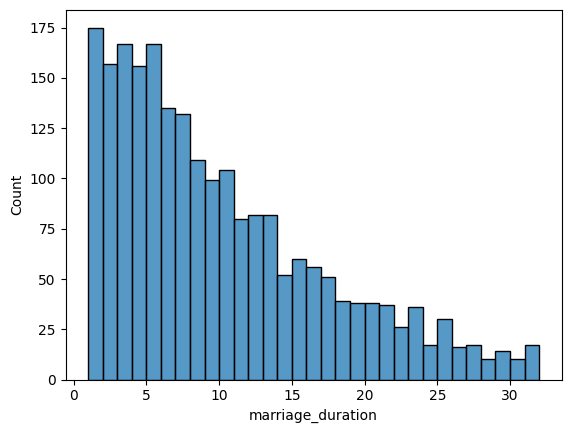

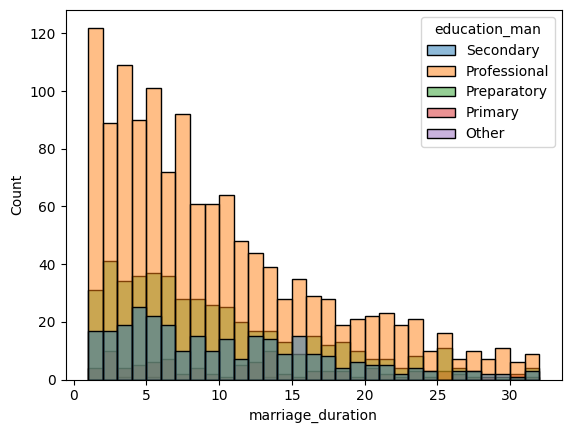

In [553]:
# Divorce: Histograms
sns.histplot(data=divorce, x="marriage_duration", binwidth=1)
plt.show()

sns.histplot(data=divorce, x="marriage_duration", hue="education_man", binwidth=1)
plt.show()

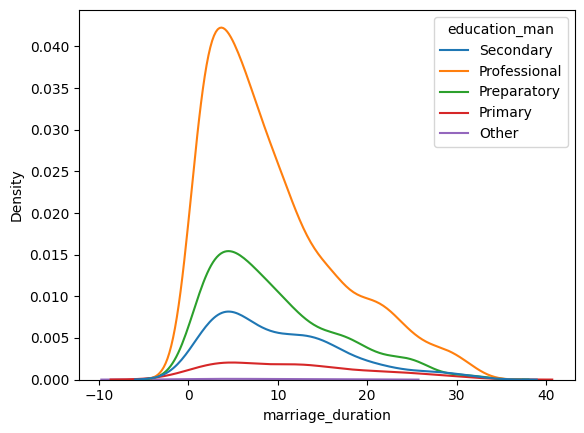

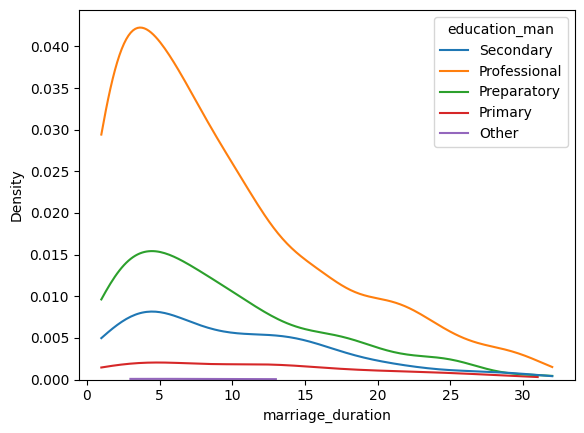

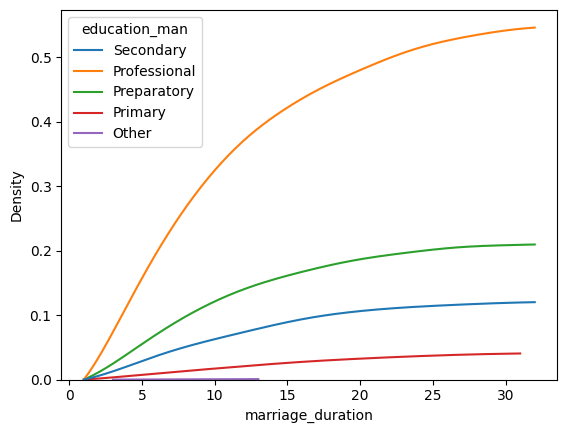

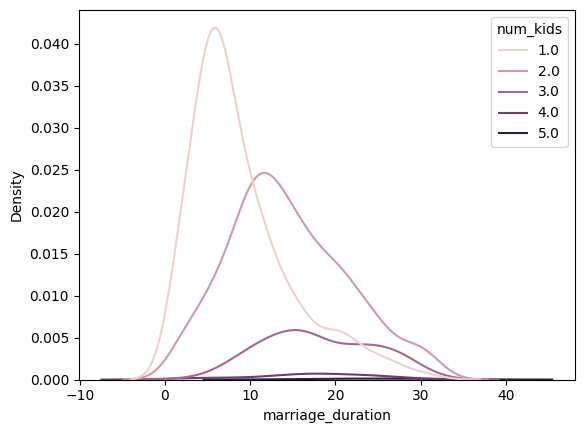

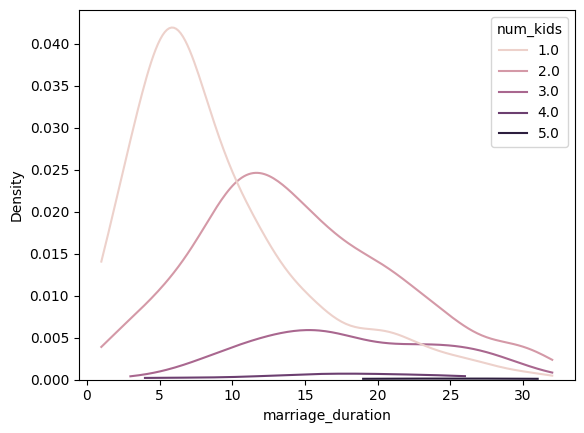

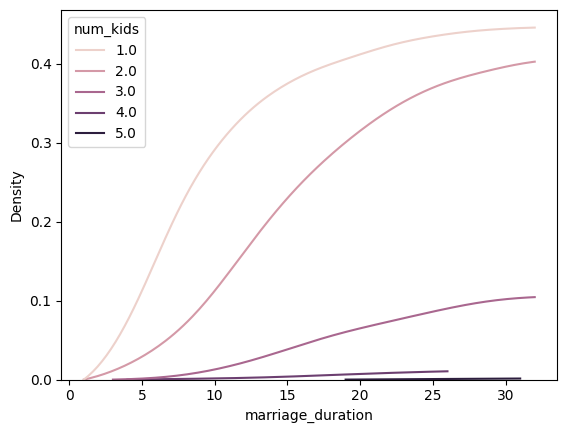

In [554]:
# Divorce: KDE Plots
sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man")
plt.show()

sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man", cut=0)
plt.show()

sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man", cut=0, cumulative=True)
plt.show()

sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids")
plt.show()

sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0)
plt.show()

sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0, cumulative=True)
plt.show()

In [555]:
# Divorce: Feature Engineering (Ages at Marriage)
divorce["man_age_marriage"] = divorce["marriage_year"] - divorce["dob_man"].dt.year
divorce["woman_age_marriage"] = divorce["marriage_year"] - divorce["dob_woman"].dt.year

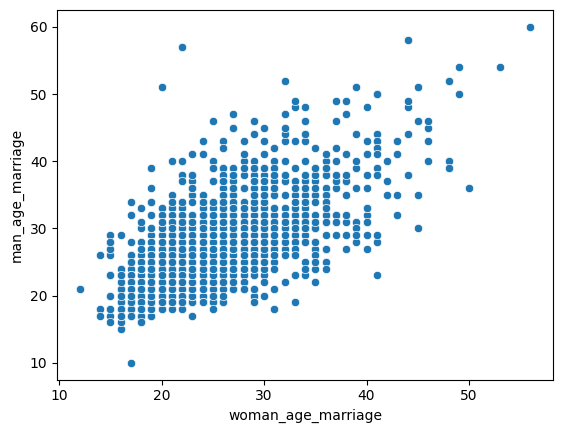

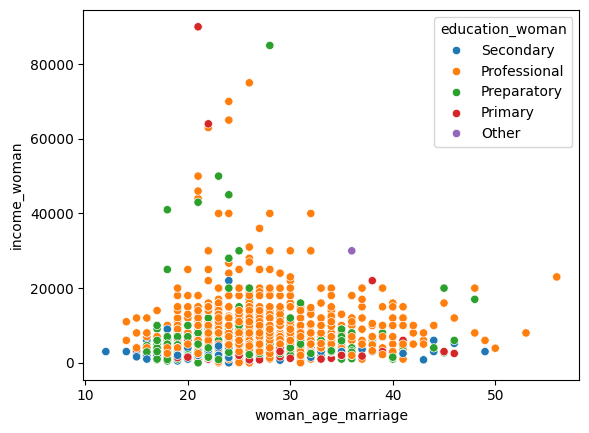

In [556]:
sns.scatterplot(data=divorce, x="woman_age_marriage", y="man_age_marriage")
plt.show()

sns.scatterplot(data=divorce, x="woman_age_marriage", y="income_woman", hue="education_woman")
plt.show()

In [557]:
# Airlines Dataset: Cleaning and Exploration
planes = pd.read_csv('Airlines_unclean.csv', index_col=0)

In [558]:
# Clean Duration column
planes["Duration"] = planes["Duration"].str.replace("h", ".")
planes["Duration"] = planes["Duration"].str.replace("m", "")
planes["Duration"] = planes["Duration"].str.replace(" ", "")
planes["Duration"] = planes["Duration"].astype(float)

In [559]:
planes["Destination"].value_counts()
planes["Destination"].value_counts(normalize=True)

Destination
Cochin       0.425773
Banglore     0.268884
Delhi        0.118200
New Delhi    0.086105
Hyderabad    0.065257
Kolkata      0.035780
Name: proportion, dtype: float64

In [560]:
pd.crosstab(planes["Source"], planes["Destination"])
pd.crosstab(planes["Source"], planes["Destination"], values=planes["Price"], aggfunc="median")

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,NaN,NaN,4823.0,NaN,NaN,10976.5
Chennai,NaN,NaN,NaN,NaN,3850.0,NaN
Delhi,NaN,10262.0,NaN,NaN,NaN,NaN
Kolkata,9345.0,NaN,NaN,NaN,NaN,NaN
Mumbai,NaN,NaN,NaN,3342.0,NaN,NaN


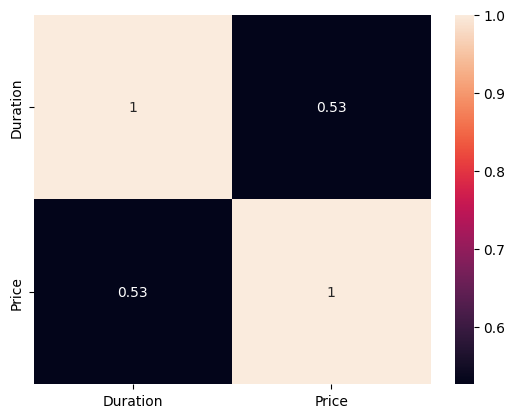

In [561]:
sns.heatmap(planes.corr(numeric_only=True), annot=True)
plt.show()

In [562]:
# Reload and further cleaning + DateTime features
planes = pd.read_csv('Airlines_unclean.csv', index_col=0)

# Clean Total_Stops
planes["Total_Stops"] = planes["Total_Stops"].str.replace("non-stop", "0")
planes["Total_Stops"] = planes["Total_Stops"].str.replace(" stops", "")
planes["Total_Stops"] = planes["Total_Stops"].str.replace(" stop", "")
planes["Total_Stops"] = planes["Total_Stops"].fillna(-1).astype(int)

# DateTime conversions and feature extraction
planes["Date_of_Journey"] = pd.to_datetime(planes["Date_of_Journey"], format='%d/%m/%Y')
planes["month"] = planes["Date_of_Journey"].dt.month
planes["weekday"] = planes["Date_of_Journey"].dt.weekday

planes["Dep_Time_dt"] = pd.to_datetime(planes["Dep_Time"], format='%H:%M', errors='coerce')
planes["Dep_Hour"] = planes["Dep_Time_dt"].dt.hour

planes["Arrival_Time_dt"] = pd.to_datetime(planes["Arrival_Time"], format='mixed', errors='coerce')
planes["Arrival_Hour"] = planes["Arrival_Time_dt"].dt.hour

print("All datetime conversions successful!")
print(planes[["Date_of_Journey", "month", "weekday", "Dep_Hour", "Arrival_Hour"]].head())

All datetime conversions successful!
  Date_of_Journey  month  weekday  Dep_Hour  Arrival_Hour
0      2019-06-09    6.0      6.0       9.0           4.0
1      2019-05-12    5.0      6.0      18.0          23.0
2      2019-03-01    3.0      4.0      16.0          21.0
3      2019-06-24    6.0      0.0       9.0          11.0
4      2019-03-12    3.0      1.0      18.0          10.0


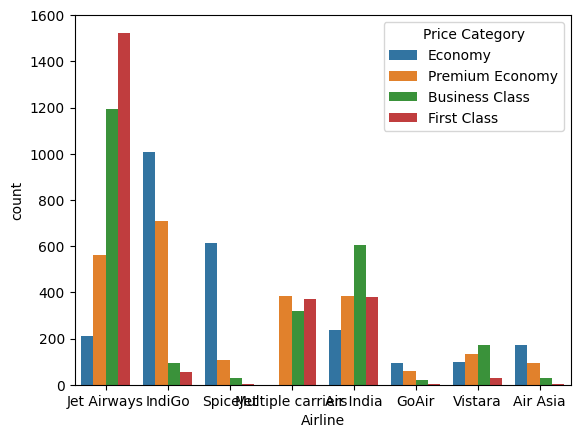

In [563]:
# Price categories and visualization
twenty_fifth = planes["Price"].quantile(0.25)
median = planes["Price"].median()
seventy_fifth = planes["Price"].quantile(0.75)
maximum = planes["Price"].max()

labels = ["Economy", "Premium Economy", "Business Class", "First Class"]
bins = [0, twenty_fifth, median, seventy_fifth, maximum]
planes["Price Category"] = pd.cut(planes["Price"], bins=bins, labels=labels)

sns.countplot(data=planes, x="Airline", hue="Price Category")
plt.show()

In [564]:
# Handling missing values
threshold = len(planes) * 0.05
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]
planes.dropna(subset=cols_to_drop, inplace=True)

airline_prices = planes.groupby("Airline")["Price"].median()
prices_dict = airline_prices.to_dict()
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

In [565]:
# Salaries Dataset: Exploration and Binning
salaries = pd.read_csv("Salary_Rupee_USD.csv", index_col=0)

In [566]:
salaries["Job_Category"].value_counts(normalize=True)

pd.crosstab(salaries["Company_Size"], salaries["Experience"])
pd.crosstab(salaries["Job_Category"], salaries["Company_Size"])
pd.crosstab(salaries["Job_Category"], salaries["Company_Size"], values=salaries["Salary_USD"], aggfunc="mean")

Company_Size,L,M,S
Job_Category,,,
Data Analytics,112851.749217,95912.685246,53741.877000
Data Engineering,118939.035000,121287.060500,86927.136000
Data Science,96489.520105,116044.455864,62241.749250
Machine Learning,140779.491529,100794.236842,78812.586462
Managerial,190551.448800,150713.628000,31484.700000
Other,92873.911385,89750.578667,69871.248000


In [567]:
# Reload with date column
salaries = pd.read_csv("Salaries_with_date_of_response.csv", index_col=0)
salaries["date_of_response"] = pd.to_datetime(salaries["date_of_response"], format='mixed', dayfirst=True)
salaries["month"] = salaries["date_of_response"].dt.month
salaries["weekday"] = salaries["date_of_response"].dt.weekday

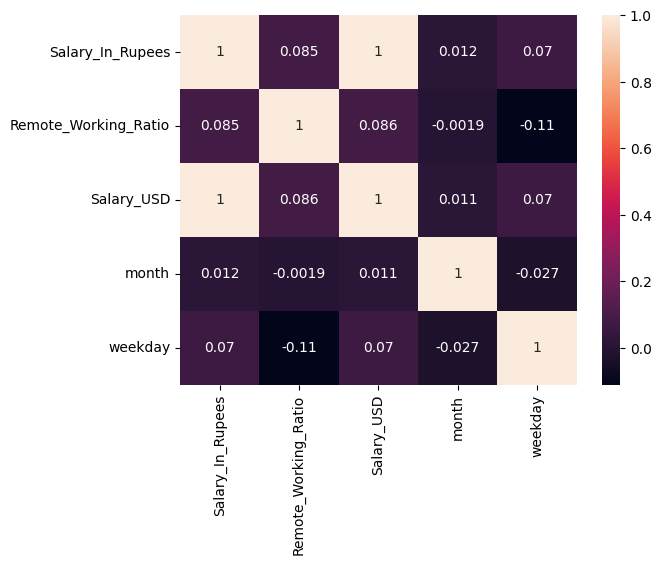

In [568]:
sns.heatmap(salaries.corr(numeric_only=True), annot=True)
plt.show()

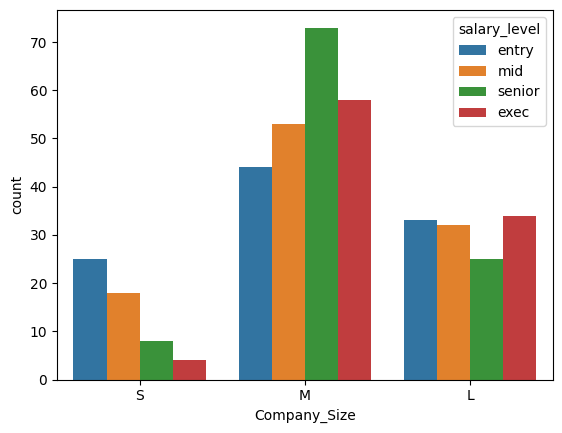

In [569]:
# Salary level categories
twenty_fifth = salaries["Salary_USD"].quantile(0.25)
salaries_median = salaries["Salary_USD"].median()
seventy_fifth = salaries["Salary_USD"].quantile(0.75)

salary_labels = ["entry", "mid", "senior", "exec"]
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]
salaries["salary_level"] = pd.cut(salaries["Salary_USD"], bins=salary_ranges, labels=salary_labels)

sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()

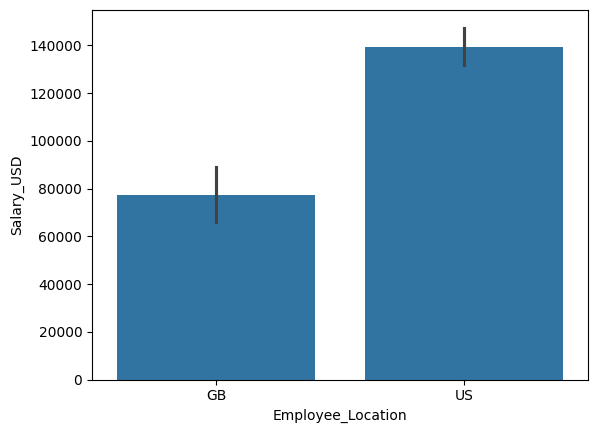

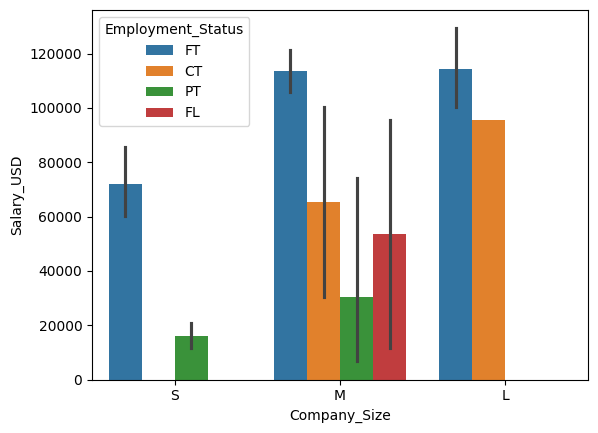

In [570]:
# Location and company size comparisons
usa_and_gb = salaries[salaries["Employee_Location"].isin(["US", "GB"])]
sns.barplot(data=usa_and_gb, x="Employee_Location", y="Salary_USD")
plt.show()

sns.barplot(data=salaries, x="Company_Size", y="Salary_USD", hue="Employment_Status")
plt.show()